# Import the important libraries

In [42]:
import pandas as pd
import chardet
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ditect the encoding of the dataset and read it as a pandas dataframe

In [3]:
with open('Sample_Superstore.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")

df = pd.read_csv('Sample_Superstore.csv', encoding=encoding)

Detected encoding: Windows-1252


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Check for null values

In [5]:
df.isna().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Drop unnecessary columns

In [8]:
df = df.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer Name', 'Customer ID','Country', 'Postal Code', 'Country', 'Product ID'], axis=1)

In [9]:
df.head()

,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Check for duplicates and drop them

In [10]:
df.duplicated().sum()


1

In [11]:
df.drop_duplicates(inplace=True)

# Convert the date column to datetime type

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9993 non-null   datetime64[ns]
 1   Ship Mode     9993 non-null   object        
 2   Segment       9993 non-null   object        
 3   City          9993 non-null   object        
 4   State         9993 non-null   object        
 5   Region        9993 non-null   object        
 6   Category      9993 non-null   object        
 7   Sub-Category  9993 non-null   object        
 8   Product Name  9993 non-null   object        
 9   Sales         9993 non-null   float64       
 10  Quantity      9993 non-null   int64         
 11  Discount      9993 non-null   float64       
 12  Profit        9993 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


# Extract years, monts, days from date column

In [26]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.day

In [27]:
df.head()

,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day,target
0,2016-11-08,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,8,34.089186
1,2016-11-08,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,8,529.881300
2,2016-06-12,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,12,-215.303386
3,2015-10-11,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,11,632.221384
4,2015-10-11,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,11,-208.566640


# Transform the 4 target columns into one column using dimensionality reduction technique

In [16]:
pca = PCA(n_components = 1)
df_pca = pca.fit_transform(df[['Sales', 'Quantity', 'Discount', 'Profit']])
df['target'] = df_pca[:,0]

In [40]:
df.drop(columns=['Sales', 'Profit', 'Discount', 'Quantity'], inplace=True)

# Check the correlation of the categorical columns with the target

In [18]:
def chi_squared_test(df, categorical_cols, target_col):
    results = {}
    for col in categorical_cols:
        contingency_table = pd.crosstab(df[col], df[target_col])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        results[col] = {'chi2': chi2, 'p_value': p_value}
    
    return pd.DataFrame(results).T.sort_values('p_value')

# Assuming 'target' is your target column
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
results = chi_squared_test(df, categorical_columns, 'target')
print(results)

                      chi2        p_value
Sub-Category  1.588227e+05   0.000000e+00
Product Name  1.675140e+07   0.000000e+00
Category      1.993696e+04  5.909980e-126
City          4.100401e+06   5.783072e-22
Region        2.397023e+04   1.275969e-05
Segment       1.540783e+04   4.131627e-01
Ship Mode     2.284069e+04   8.408683e-01
State         3.624456e+05   1.000000e+00


# Plotting cities and regions values

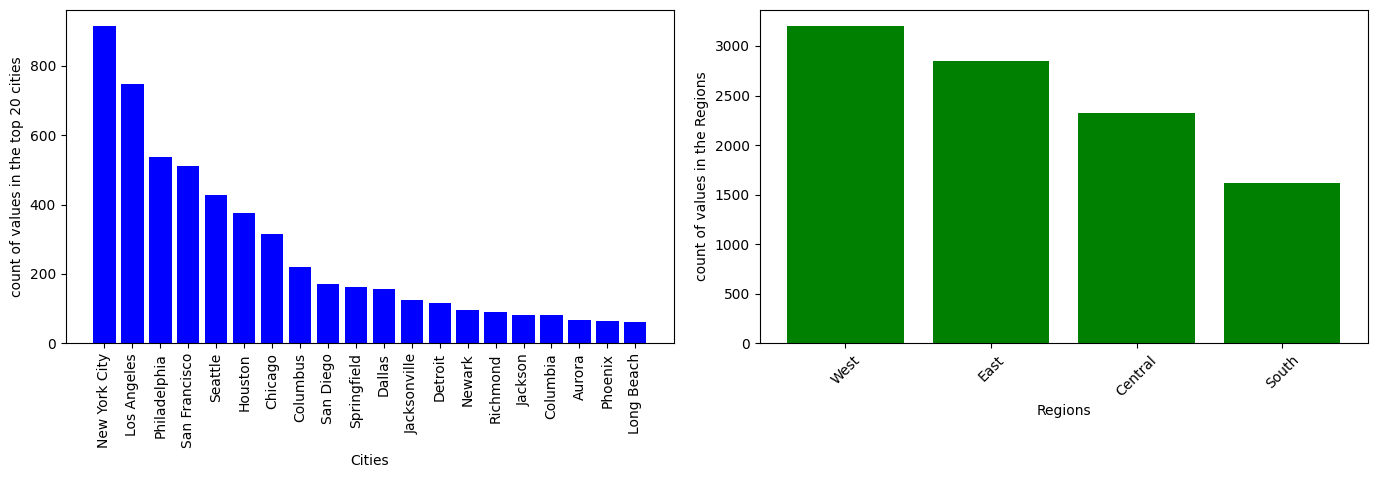

In [19]:
Cities_frequency = df['City'].value_counts().head(20).reset_index()
Regions_frequency = df['Region'].value_counts().reset_index()
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].bar(Cities_frequency['City'], Cities_frequency['count'], color = 'blue')
ax[0].set_xlabel('Cities')
ax[0].set_ylabel('count of values in the top 20 cities')
ax[0].tick_params(axis='x', rotation=90)
ax[1].bar(Regions_frequency['Region'], Regions_frequency['count'], color = 'green')
ax[1].set_xlabel('Regions')
ax[1].set_ylabel('count of values in the Regions')
ax[1].tick_params(axis='x', rotation=45)
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()


# plotting years, months, and days values

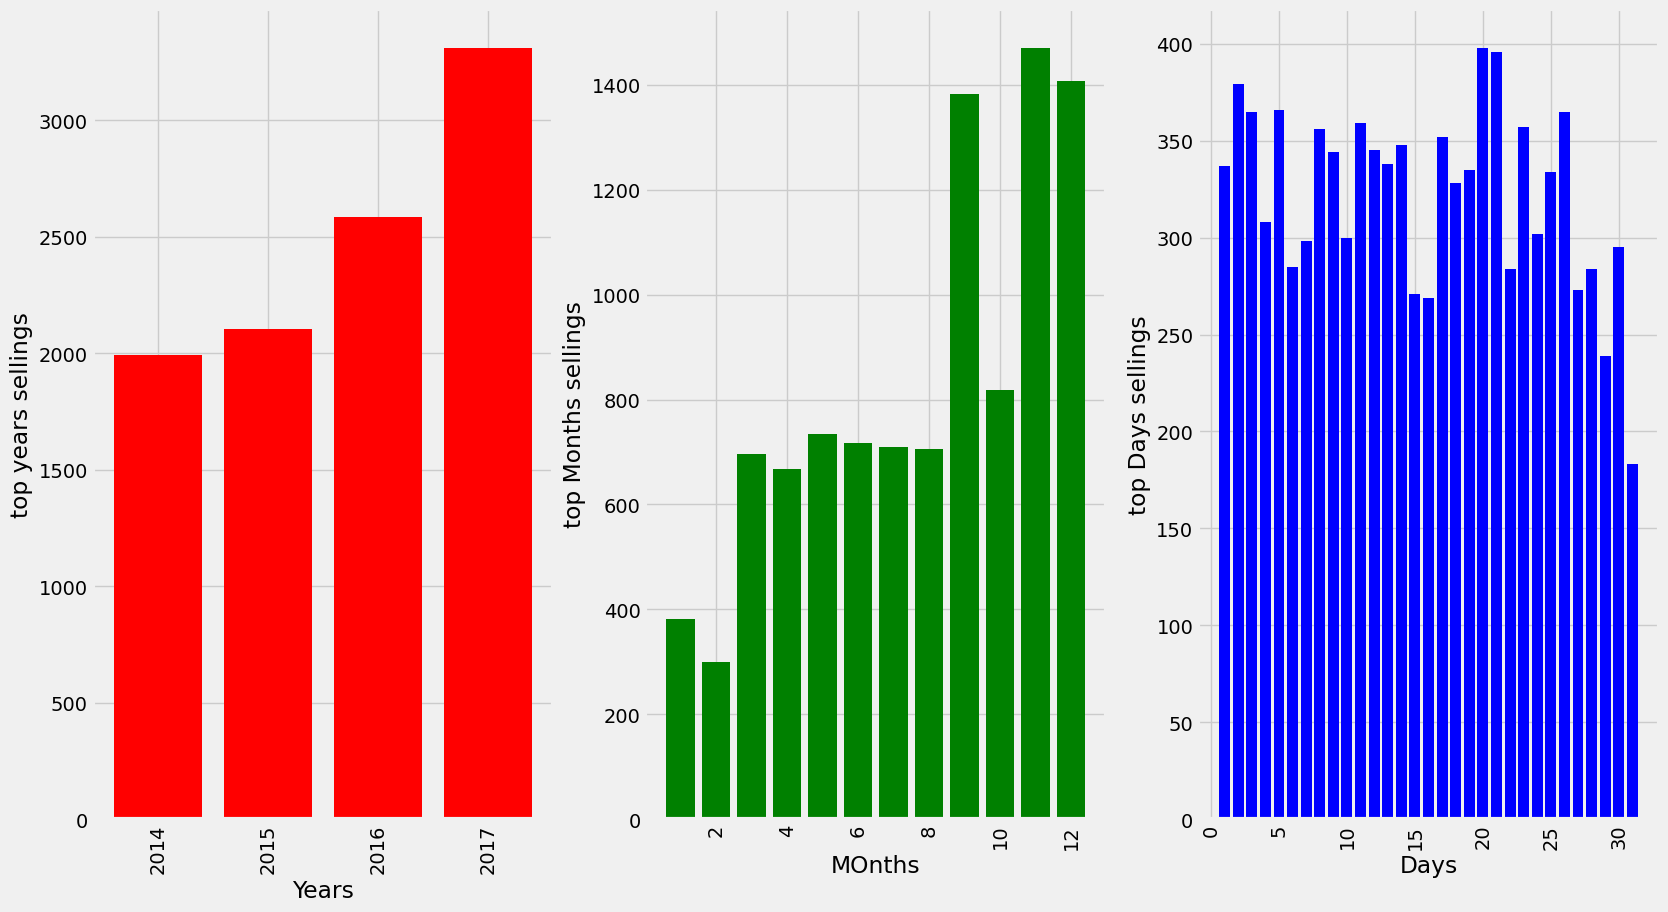

In [37]:
months_frequency = df['Order Month'].value_counts().reset_index()
years_frequency = df['Order Year'].value_counts().reset_index()
days_frequency = df['Order Day'].value_counts().reset_index()
fig, ax = plt.subplots(1,3, figsize=(18,10))
ax[0].bar(years_frequency['Order Year'], years_frequency['count'], color = 'red')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('top years sellings')
ax[0].tick_params(axis='x', rotation=90)
ax[1].bar(months_frequency['Order Month'], months_frequency['count'], color = 'green')
ax[1].set_xlabel('MOnths')
ax[1].set_ylabel('top Months sellings')
ax[1].tick_params(axis='x', rotation=90)
ax[2].bar(days_frequency['Order Day'], days_frequency['count'], color = 'blue')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('top Days sellings')
ax[2].tick_params(axis='x', rotation=90)
plt.show()


# Splitting the data to train and test datasets

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'],
                                                    test_size=0.2,random_state=42)